In [142]:
%load_ext autoreload
%autoreload 2


from util2 import *
from myalgorithm_0628_1 import algorithm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


- 실험해볼 내용들

1. 서로 비슷한 번들이나 주문끼리 병합 시도하는게 시간 효율적이지 않나?
2. 서로 비슷하다의 기준은 어떻게 잡으면 좋을까?
3. 초반에 어느 정도 최적화된 값에서 시작하면 어떨까?

## 기본 코드

In [143]:
problem_file = '../alg_test_problems_20240429/TEST_K100_1.json'

with open(problem_file, 'r') as f:
    prob = json.load(f)

K = prob['K']

ALL_ORDERS = [Order(order_info) for order_info in prob['ORDERS']]
ALL_RIDERS = [Rider(rider_info) for rider_info in prob['RIDERS']]

DIST = np.array(prob['DIST'])
for r in ALL_RIDERS:
    r.T = np.round(DIST/r.speed + r.service_time).astype(int)

In [144]:
ALL_RIDERS

[Rider([BIKE, 5.291005291005291, 100, 60, 5000, 120, 20]),
 Rider([WALK, 1.3227513227513228, 70, 30, 5000, 120, 30]),
 Rider([CAR, 4.2328042328042335, 200, 100, 5000, 180, 100])]

## 좌표와 거리의 관계 확인

In [84]:
X1 = []
X2 = []
X3 = []
y = []
for i in range(K):
    for j in range(i + 1, K):
        x1 = ALL_ORDERS[i].shop_lat
        y1 = ALL_ORDERS[i].shop_lon

        x2 = ALL_ORDERS[j].shop_lat
        y2 = ALL_ORDERS[j].shop_lon

        dist = DIST[i][j]

        diff1 = abs(x1 - x2)
        diff2 = abs(y1 - y2)

        # print(diff1 * 100, diff2 * 100, dist)     

        # print((diff1 + diff2) * 103400, dist)
        # print((diff1 ** 2 + diff2 ** 2) ** (1/2) * 125950, dist)
        # print((diff1 ** 2 + diff2 ** 2) * 7258000, dist)
        

        X1.append((diff1 + diff2) * 103400)
        X2.append((diff1 ** 2 + diff2 ** 2) ** (1/2) * 125950)
        X3.append((diff1 ** 2 + diff2 ** 2) * 7258000)

        y.append(dist)


In [85]:
import statsmodels.api as sm
import pandas as pd

X = pd.DataFrame({'X_value': X1})

X = sm.add_constant(X)
ols = sm.OLS(y, X)
model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 2.310e+05
Date:                Fri, 28 Jun 2024   Prob (F-statistic):               0.00
Time:                        22:13:04   Log-Likelihood:                -37448.
No. Observations:                4950   AIC:                         7.490e+04
Df Residuals:                    4948   BIC:                         7.491e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.7352     11.574      1.532      0.126      -4.955      40.425
X_value        1.0324      0.002    480.597      0.000       1.028       1.037
==============================================================================
Omnibus:                     1180.632   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3410.614
Skew:                           1.240   Prob(JB):                         0.00
Kurtosis:                       6.223   Cond. No.                     9.39e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
import statsmodels.api as sm
import pandas as pd

X = pd.DataFrame({'X_value': X2})

X = sm.add_constant(X)
ols = sm.OLS(y, X)
model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 7.172e+05
Date:                Fri, 28 Jun 2024   Prob (F-statistic):               0.00
Time:                        22:13:04   Log-Likelihood:                -34679.
No. Observations:                4950   AIC:                         6.936e+04
Df Residuals:                    4948   BIC:                         6.938e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        267.8082      6.345     42.209      0.000     255.369     280.247
X_value        0.9781      0.001    846.853      0.000       0.976       0.980
==============================================================================
Omnibus:                     1348.366   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3223.405
Skew:                           1.516   Prob(JB):                         0.00
Kurtosis:                       5.536   Cond. No.                     9.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
import statsmodels.api as sm
import pandas as pd

X = pd.DataFrame({'X_value': X3})

X = sm.add_constant(X)
ols = sm.OLS(y, X)
model = sm.OLS(y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                 3.322e+04
Date:                Fri, 28 Jun 2024   Prob (F-statistic):               0.00
Time:                        22:13:04   Log-Likelihood:                -41956.
No. Observations:                4950   AIC:                         8.392e+04
Df Residuals:                    4948   BIC:                         8.393e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2605.5653     19.726    132.089      0.000    2566.894    2644.237
X_value        0.1426      0.001    182.255      0.000       0.141       0.144
==============================================================================
Omnibus:                     1527.213   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8627.405
Skew:                          -1.358   Prob(JB):                         0.00
Kurtosis:                       8.870   Cond. No.                     3.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> 거리 행렬의 값을 유클리디언 거리 * 상수 가중치로 프록시할 수 있음을 확인하였음. 실제 사용시에는 가중치는 반영할 필요가 없을 수도 있음

## 초기에 비슷한 번들로 먼저 묶어서 테스트 해보기

### 번들 내 주문 요소들의 평균 계산

In [145]:
car_rider = ALL_RIDERS[2]
all_bundles_original = []

for ord in ALL_ORDERS:
    new_bundle = Bundle(ALL_ORDERS, car_rider, [ord.id], [ord.id], ord.volume, DIST[ord.id, ord.id+K])
    car_rider.available_number -= 1
    all_bundles_original.append(new_bundle)

all_bundles = all_bundles_original.copy()

In [146]:
for i in range(len(all_bundles)):
    bundle = all_bundles[i]

    shop_seq = bundle.shop_seq

    xs_s_sum = 0
    ys_s_sum = 0

    xs_e_sum = 0
    ys_e_sum = 0

    readytimes_sum = 0
    deadlines_sum = 0

    shop_seq_len = len(shop_seq)

    for order_num in shop_seq:
        order = ALL_ORDERS[order_num]

        xs_s_sum += order.shop_lat
        ys_s_sum += order.shop_lon

        xs_e_sum += order.dlv_lat
        ys_e_sum += order.dlv_lon

        readytimes_sum += order.ready_time
        deadlines_sum += order.deadline

    xs_s_avg = xs_s_sum / shop_seq_len
    ys_s_avg = ys_s_sum / shop_seq_len

    xs_e_avg = xs_e_sum / shop_seq_len
    ys_e_avg = ys_e_sum / shop_seq_len

    readytimes_avg = readytimes_sum / shop_seq_len
    deadlines_avg = deadlines_sum / shop_seq_len

    avg_info = [xs_s_avg, ys_s_avg, xs_e_avg, ys_e_avg, readytimes_avg, deadlines_avg]

    bundle.avg_info = avg_info

### 번들별로 서로 가까운 정도 계산

In [147]:
edges = []
for i in range(len(all_bundles)):
    for j in range(i + 1, len(all_bundles)):
        avg_info1 = all_bundles[i].avg_info
        avg_info2 = all_bundles[j].avg_info

        sx1, sy1, ex1, ey1, r1, d1 = avg_info1
        sx2, sy2, ex2, ey2, r2, d2 = avg_info2

        caluled_dist1 = get_dist_by_coords(sx1, sy1, sx2, sy2)
        caluled_dist2 = get_dist_by_coords(ex1, ey1, ex2, ey2)

        r_diff = abs(r1 - r2)
        d_diff = abs(d1 - d2)

        weight = 4

        diff_score = caluled_dist1 + caluled_dist2 + r_diff * weight + d_diff * weight

        edges.append((i, j, diff_score))

### MST의 방식을 활용하여 번들 병합하기 (라이더의 수 제한을 고려하지 않았음)

In [148]:
def find(v):
    while v != parent[v]:
        parent[v] = parent[parent[v]]
        v = parent[v]

    return v

def union(a, b, new_bundle):
    if a > b:
        a, b = b, a

    parent[b] = a
    all_bundles[a] = new_bundle

parent = list(range(K))
edges.sort(key=lambda x: x[2])

for bundle_num1, bundle_num2, diff_score in edges:
    rbn1, rbn2 = find(bundle_num1), find(bundle_num2)

    if rbn1 == rbn2:
        continue
    
    new_bundle = try_merging_bundles3(K, DIST, ALL_ORDERS, ALL_RIDERS, all_bundles[rbn1], all_bundles[rbn2])
    if new_bundle is not None:
        union(rbn1, rbn2, new_bundle)

parent = [find(v) for v in parent]

### MST 방식 초기화 결과 확인

#### 기존 초기 결과

In [149]:
print(sum((bundle.cost for bundle in all_bundles)) / K)

8002.920000000002


#### 번들을 주문 4개까지 묶을 수 있게 허용한 경우의 결과

In [57]:
from collections import Counter

result_bundles = [all_bundles[v] for v in set(parent)]
ct = Counter([len(v.shop_seq) for v in result_bundles])

print(ct)
print(sum((bundle.cost for bundle in result_bundles)) / K)

Counter({2: 29, 3: 12, 1: 6})
4253.5380000000005


> 번들을 4개까지 묶을 수 있게 허용해도 4개 묶인 경우가 없으며, 시간은 5.0초 걸림

#### 번들을 주문 3개까지 묶을 수 있게 허용한 경우의 결과

In [150]:
result_bundles = [all_bundles[v] for v in set(parent)]

print(sum((bundle.cost for bundle in result_bundles)) / K)

4253.5380000000005


> 번들을 3개까지 묶을 수 있게 허용한 결과 시간은 0.2초 걸림

In [98]:
solution = [
    # rider type, shop_seq, dlv_seq
    [bundle.rider.type, bundle.shop_seq, bundle.dlv_seq] for bundle in result_bundles
]

In [99]:
checked_solution = solution_check(K, ALL_ORDERS, ALL_RIDERS, DIST, solution)

The number of used riders of type BIKE exceeds the given available limit!


### 결과 시각화

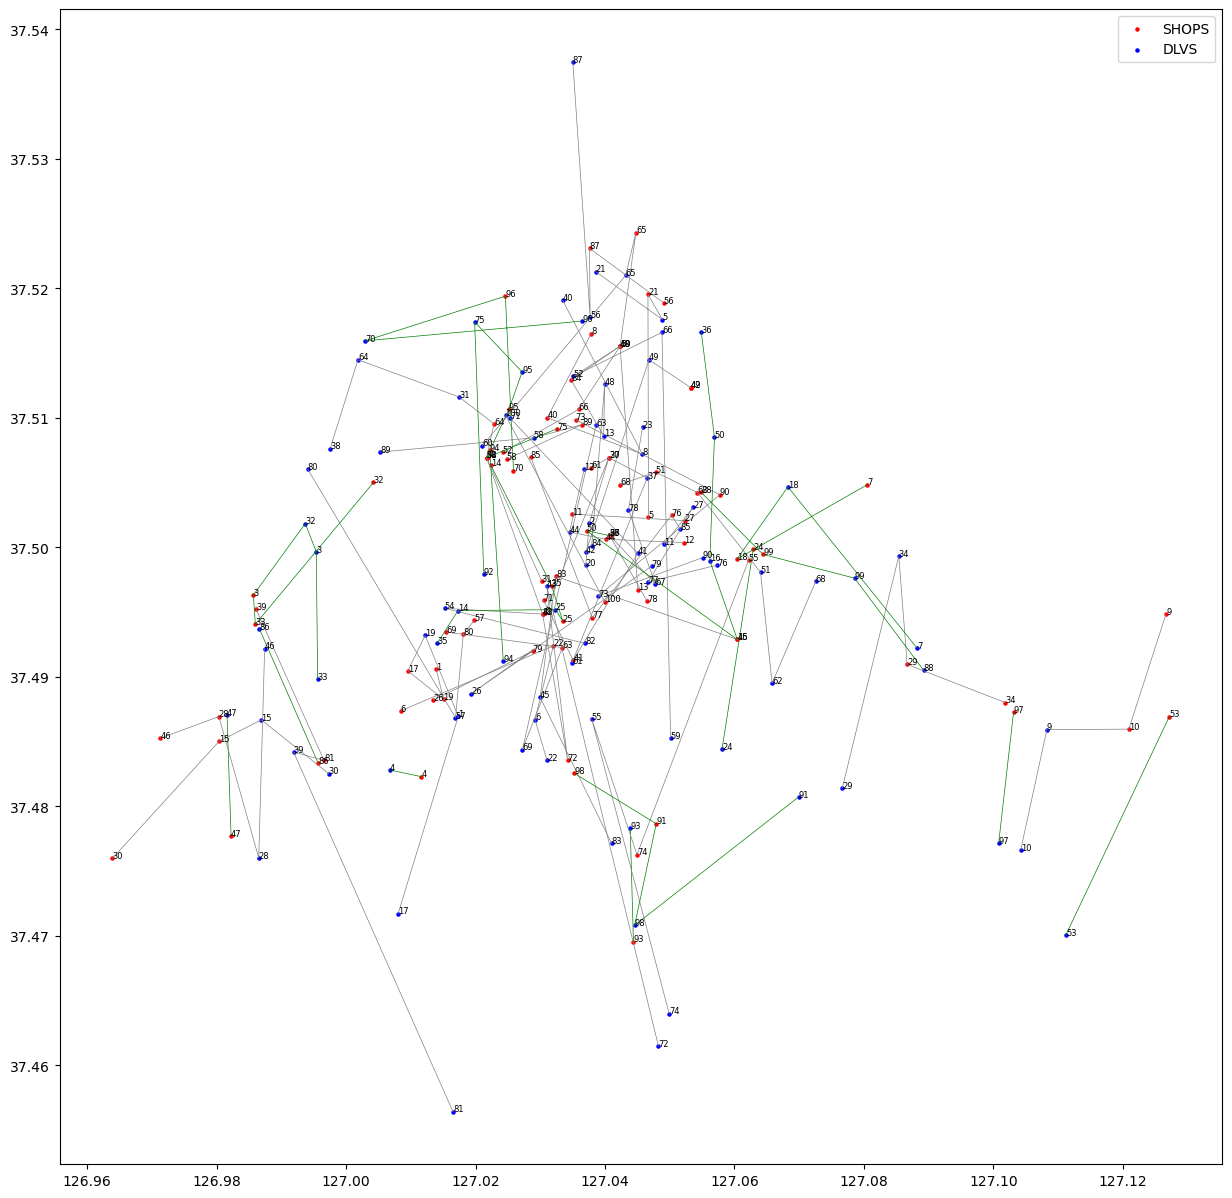

In [94]:
draw_route_solution2(ALL_ORDERS, checked_solution)

궁금한 점: 번들을 묶을 때 번들 내의 가장 이른 시점의 주문 준비 시간과 가장 늦은 시점의 주문 데드라인의 시간 차이의 분포는 어떻게 될까? - 만약 이것을 확인한다면, 처음부터 불가능에 가까운 것을 시도할 필요가 없지 않을까?

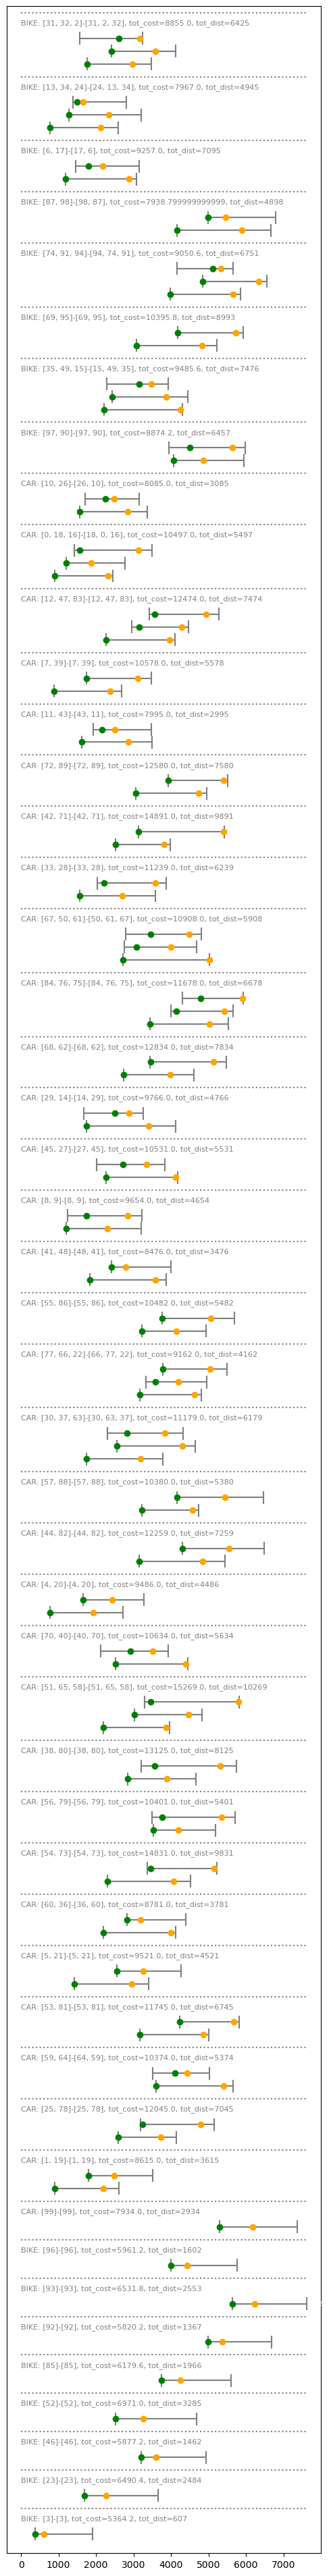

In [95]:
draw_bundle_solution(ALL_ORDERS, ALL_RIDERS, DIST, checked_solution)

In [96]:
inf = float('inf')

diffs = []
for bundle in checked_solution['bundles']:
    shops = bundle[1]

    if len(shops) <= 1:
        continue

    min_ready_time = inf
    max_deadline = -inf
    for order_num in shops:
        ready_time = ALL_ORDERS[order_num].ready_time
        deadline = ALL_ORDERS[order_num].deadline

        min_ready_time = min(min_ready_time, ready_time)
        max_deadline = max(max_deadline, deadline)

    diff = max_deadline - min_ready_time
    diffs.append(diff)


(array([3., 5., 7., 6., 8., 5., 3., 1., 1., 1.]),
 array([1803. , 1985.4, 2167.8, 2350.2, 2532.6, 2715. , 2897.4, 3079.8,
        3262.2, 3444.6, 3627. ]),
 <BarContainer object of 10 artists>)

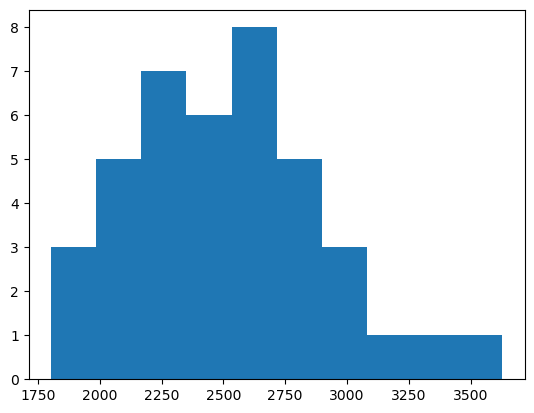

In [97]:
import matplotlib.pyplot as plt

plt.hist(diffs, bins=10)

(array([ 6.,  8., 16., 14., 13., 21.,  9.,  8.,  3.,  2.]),
 array([ 384. ,  908.8, 1433.6, 1958.4, 2483.2, 3008. , 3532.8, 4057.6,
        4582.4, 5107.2, 5632. ]),
 <BarContainer object of 10 artists>)

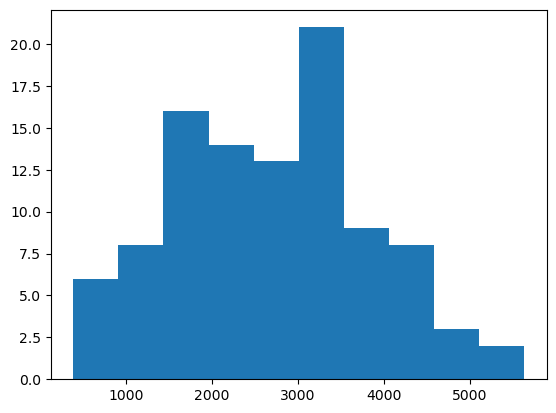

In [98]:
plt.hist([v.ready_time for v in ALL_ORDERS])

(array([ 2.,  6., 18., 16., 14., 15., 17.,  5.,  5.,  2.]),
 array([1907. , 2477.8, 3048.6, 3619.4, 4190.2, 4761. , 5331.8, 5902.6,
        6473.4, 7044.2, 7615. ]),
 <BarContainer object of 10 artists>)

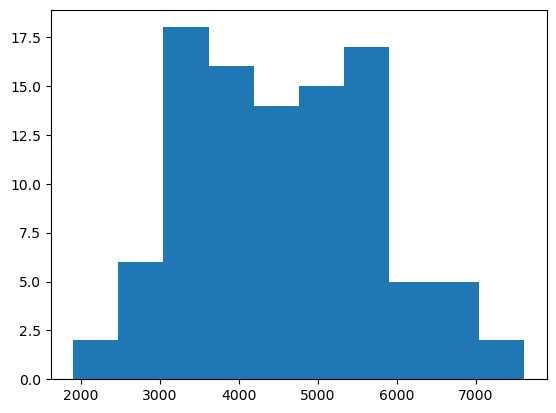

In [99]:
plt.hist([v.deadline for v in ALL_ORDERS])

(array([ 8., 13., 18., 17., 14., 16.,  4.,  6.,  1.,  3.]),
 array([1426., 1537., 1648., 1759., 1870., 1981., 2092., 2203., 2314.,
        2425., 2536.]),
 <BarContainer object of 10 artists>)

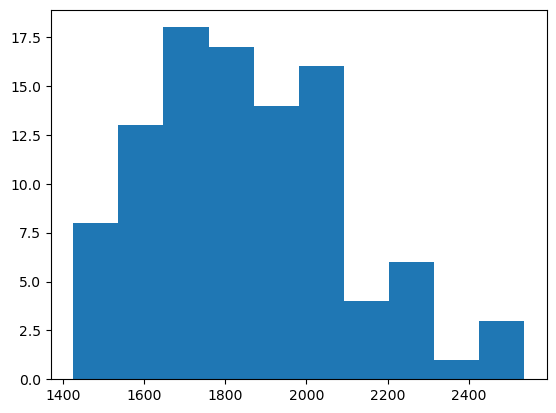

In [100]:
plt.hist([v.deadline - v.ready_time for v in ALL_ORDERS])

(array([18.,  9., 19., 12., 10.,  9.,  8.,  2.,  3.,  1.,  2.,  0.,  0.,
         0.,  0.,  1.,  1.,  2.,  0.,  3.]),
 array([ 12. ,  16.4,  20.8,  25.2,  29.6,  34. ,  38.4,  42.8,  47.2,
         51.6,  56. ,  60.4,  64.8,  69.2,  73.6,  78. ,  82.4,  86.8,
         91.2,  95.6, 100. ]),
 <BarContainer object of 20 artists>)

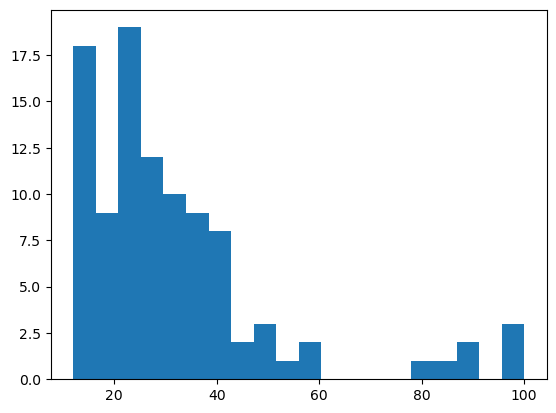

In [101]:
plt.hist([v.volume for v in ALL_ORDERS], bins=20)

In [102]:
ALL_RIDERS

[Rider([BIKE, 5.291005291005291, 100, 60, 5000, 120, 20]),
 Rider([WALK, 1.3227513227513228, 70, 30, 5000, 120, 30]),
 Rider([CAR, 4.2328042328042335, 200, 100, 5000, 180, 100])]

(array([ 9.,  0.,  0.,  0.,  0., 29.,  0.,  0.,  0., 11.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

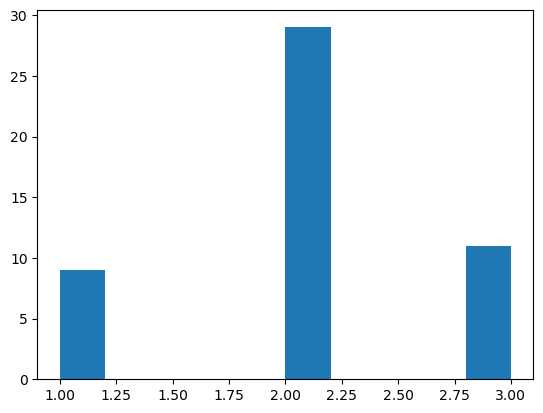

In [103]:
plt.hist([len(v[1]) for v in checked_solution['bundles']])

> 4개 이상의 주문을 가진 번들은 거의 나오지 않음.

1: 25, 2: 65, 3: 15 정도로 나옴